# CNN_class2

## 환경 구성

In [68]:
# 커널 위치 확인

import sys
sys.executable

'C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe'

In [2]:
# cnn에 필요한 패키지 install

! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install tensorflow
! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install keras

# 결과값 확인에 필요한 패키지 install

! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install Image
! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install pillow
! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install SciPy
! C:\\Users\\pc\\anaconda3\\envs\\convlstm2d\\python.exe -m pip install matplotlib

In [3]:
# 필요한 모듈 import

import keras
keras.__version__

import os, shutil

'2.11.0'

In [5]:
# 원본 이미지 경로 path 선언

original_dataset_dir = 'd:/mul_cnn/image'

In [6]:
# cnn에 사용할 이미지 경로 path 선언

base_dir = 'd:/mul_cnn/image/wound_burn'

if not os.path.isdir("base_dir"):
    os.makedirs("base_dir")

In [7]:
# train, validation, test 디렉토리 생성

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir("train_dir"):
    os.makedirs("train_dir")

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir("validation_dir"):
    os.makedirs("validation_dir")

test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir("test_dir"):
    os.makedirs("test_dir")

In [10]:
# train, validation, test 디렉토리 내 클래스별 디렉토리 생성

train_wound_dir = os.path.join(train_dir, 'wound')
if not os.path.isdir("train_wound_dir"):
    os.makedirs("train_wound_dir")

train_burn_dir = os.path.join(train_dir, 'burn')
if not os.path.isdir("train_burn_dir"):
    os.makedirs("train_burn_dir")

validation_wound_dir = os.path.join(validation_dir, 'wound')
if not os.path.isdir("validation_wound_dir"):
    os.makedirs("validation_wound_dir")

validation_burn_dir = os.path.join(validation_dir, 'burn')
if not os.path.isdir("validation_burn_dir"):
    os.makedirs("validation_burn_dir")

test_wound_dir = os.path.join(test_dir, 'wound')
if not os.path.isdir("test_wound_dir"):
    os.makedirs("test_wound_dir")

test_burn_dir = os.path.join(test_dir, 'burn')
if not os.path.isdir("test_burn_dir"):
    os.makedirs("test_burn_dir")

In [18]:
# 원본 이미지 디렉토리에서 cnn에 사용할 디렉토리로 개수 정해서 옮겨주기
#  위에서 선언해준 path사용 original_dataset_dir, base_dir

# 학습할 디렉토리 초기화
import glob
[os.remove(f) for f in glob.glob(base_dir+"*/*/*.jpg")]

fnames = [original_dataset_dir +'burn/burn{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "burn", fname_split)
    dst = os.path.join(base_dir, "train", "burn", fname_split)
    shutil.copyfile(src, dst)

fnames = [original_dataset_dir +'burn/burn{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "burn", fname_split)
    dst = os.path.join(base_dir, "validation", "burn", fname_split)
    shutil.copyfile(src, dst)
    
fnames = [original_dataset_dir +'burn/burn{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "burn", fname_split)
    dst = os.path.join(base_dir, "test", "burn", fname_split)
    shutil.copyfile(src, dst)
    
fnames = [original_dataset_dir+'wound/wound{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "wound", fname_split)
    dst = os.path.join(base_dir, "train", "wound", fname_split)
    shutil.copyfile(src, dst)   
    
fnames = [original_dataset_dir+'wound/wound{}.jpg'.format(i) for i in range(3000, 4000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "wound", fname_split)
    dst = os.path.join(base_dir, "validation", "wound", fname_split)
    shutil.copyfile(src, dst)
    
fnames = [original_dataset_dir+'wound/wound{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    fname_split = fname.split("/")[-1]
    src = os.path.join(original_dataset_dir, "wound", fname_split)
    dst = os.path.join(base_dir, "test", "wound", fname_split)
    shutil.copyfile(src, dst)

In [16]:
# cnn에 사용할 디렉토리내 파일 개수 파악

print('total training burn images:', len(os.listdir(train_burn_dir)))
print('total training wound images:', len(os.listdir(train_wound_dir)))
print('total validation burn images:', len(os.listdir(validation_burn_dir)))
print('total validation wound images:', len(os.listdir(validation_wound_dir)))
print('total test burn images:', len(os.listdir(test_burn_dir)))
print('total test wound images:', len(os.listdir(test_wound_dir)))

total training burn images: 3000
total training wound images: 3000
total validation burn images: 1000
total validation wound images: 1000
total test burn images: 1000
total test wound images: 1000


## 모델 구성하기
영상 분류에 높은 성능을 보이고 있는 컨볼루션 신경망 모델을 구성해보겠습니다. 각 레이어들은 이전 강좌에서 살펴보았으므로 크게 어려움없이 구성할 수 있습니다.

컨볼루션 레이어 : 입력 이미지 크기 128 x 128, 입력 이미지 채널 3개, 필터 크기 3 x 3, 필터 수 32개, 활성화 함수 ‘relu’

컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 64개, 활성화 함수 ‘relu’

맥스풀링 레이어 : 풀 크기 2 x 2

컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 128개, 활성화 함수 ‘relu’

맥스풀링 레이어 : 풀 크기 2 x 2

컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 128개, 활성화 함수 ‘relu’

맥스풀링 레이어 : 풀 크기 2 x 2

플래튼 레이어

댄스 레이어 : 출력 뉴런 수 512개, 활성화 함수 ‘relu’

댄스 레이어 : 출력 뉴런 수 1개, 활성화 함수 ‘sigmoid’

In [54]:
# 모델 구성

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
# 구성한 모델 확인

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

## 모델 학습과정 설정하기

모델을 정의했다면 모델을 손실함수와 최적화 알고리즘으로 엮어봅니다.

loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수 입니다. 2개의 클래스 문제이므로 'binary_crossentropy'으로 지정합니다.
optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 optimizers.RMSprop(lr=1e-4)’을 사용합니다.
metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 ‘accuracy’으로 지정합니다.

In [61]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\pc\anaconda3\envs\convlstm2d\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## 데이터셋 생성하기

케라스에서는 이미지 파일을 쉽게 학습시킬 수 있도록 ImageDataGenerator 클래스를 제공합니다. ImageDataGenerator 클래스는 데이터 증강 (data augmentation)을 위해 막강한 기능을 제공하는 데, 이 기능들은 다른 강좌에세 다루기로 하고, 본 강좌에서는 특정 폴더에 이미지를 분류 해놓았을 때 이를 학습시키기 위한 데이터셋으로 만들어주는 기능을 사용해보겠습니다.

먼저 ImageDataGenerator 클래스를 이용하여 객체를 생성한 뒤 flow_from_directory() 함수를 호출하여 제네레이터(generator)를 생성합니다. flow_from_directory() 함수의 주요인자는 다음과 같습니다.

첫번재 인자 : 이미지 경로를 지정합니다.

target_size : 패치 이미지 크기를 지정합니다. 폴더에 있는 원본 이미지 크기가 다르더라도 target_size에 지정된 크기로 자동 조절됩니다.

batch_size : 배치 크기를 지정합니다.

class_mode : 분류 방식에 대해서 지정합니다.

categorical : 2D one-hot 부호화된 라벨이 반환됩니다.

binary : 1D 이진 라벨이 반환됩니다.

sparse : 1D 정수 라벨이 반환됩니다.

None : 라벨이 반환되지 않습니다.

본 예제에서는 패치 이미지 크기를 128 x 128로 하였으니 target_size도 (128, 128)로 셋팅하였습니다. 훈련 데이터 수가 클래스당 3000개이니 배치 크기를 20으로 지정하여 총 150번 배치를 수행하면 하나의 epoch가 수행될 수 있도록 하였습니다. 다중 클래스 문제이므로 class_mode는 ‘categorical’로 지정하였습니다. 그리고 제네레이터는 훈련용과 검증용으로 두 개를 만들었습니다.

In [62]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## 데이터셋 확인

In [57]:
import PIL
import scipy
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 128, 128, 3)
labels batch shape: (20,)


## 모델 학습시키기
케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만 제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용합니다. 본 예제에서는 ImageDataGenerator라는 제네레이터로 이미지를 담고 있는 배치로 학습시키기 때문에 fit_generator() 함수를 사용하겠습니다.

첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정합니다. 본 예제에서는 앞서 생성한 train_generator으로 지정합니다.

steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 총 6000개의 훈련 샘플이 있고 배치사이즈가 20이므로 300 스텝으로 지정합니다.

epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 30번을 반복적으로 학습시켜 보겠습니다.

validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 본 예제에서는 앞서 생성한 
validation_generator으로 지정합니다.

validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 총 2000개의 검증 샘플이 있고 배치사이즈가 20이므로 100 스텝으로 지정합니다.

In [66]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=300,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/30


C:\Users\pc\AppData\Local\Temp\ipykernel_9744\4060463056.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


300/300 [==============================] - 108s 360ms/step - loss: 0.1231 - acc: 0.9528
Epoch 2/30
300/300 [==============================] - 103s 344ms/step - loss: 0.1133 - acc: 0.9580
Epoch 3/30
300/300 [==============================] - 110s 367ms/step - loss: 0.1024 - acc: 0.9617
Epoch 4/30
300/300 [==============================] - 111s 369ms/step - loss: 0.0888 - acc: 0.9693
Epoch 5/30
300/300 [==============================] - 109s 365ms/step - loss: 0.0833 - acc: 0.9718
Epoch 6/30
300/300 [==============================] - 106s 353ms/step - loss: 0.0795 - acc: 0.9708
Epoch 7/30
300/300 [==============================] - 120s 400ms/step - loss: 0.0695 - acc: 0.9747
Epoch 8/30
300/300 [==============================] - 108s 360ms/step - loss: 0.0660 - acc: 0.9780
Epoch 9/30
300/300 [==============================] - 107s 356ms/step - loss: 0.0547 - acc: 0.9800
Epoch 10/30
300/300 [==============================] - 108s 359ms/step - loss: 0.0503 - acc: 0.9823
Epoch 11/30
300/300 

In [64]:
%pwd
%cd D:\mul_cnn
model.save('wound_burn_b20_s300.h5')

D:\mul_cnn


## 모델 평가하기

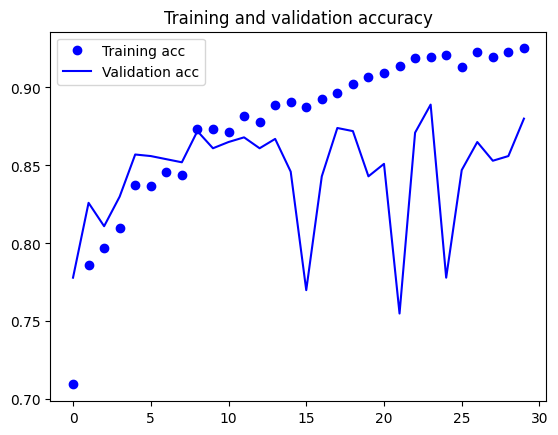

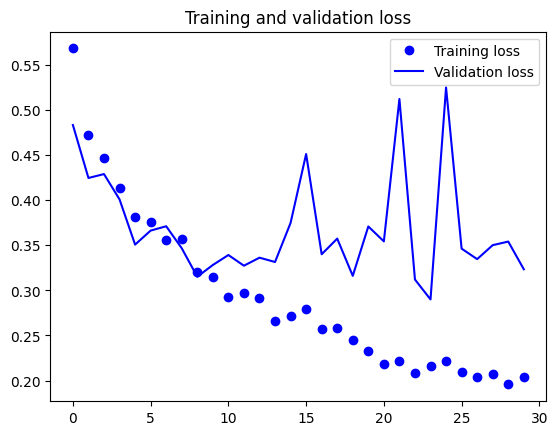

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
scores = model.evaluate_generator(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

C:\Users\pc\AppData\Local\Temp\ipykernel_9744\2069313489.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator, steps=5)


acc: 90.00%


In [37]:
import numpy as np
print("-- Predict --")
output = model.predict_generator(validation_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(validation_generator.class_indices)
print(output)

-- Predict --


C:\Users\pc\AppData\Local\Temp\ipykernel_9744\2625220887.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(validation_generator, steps=5)


{'burn': 0, 'wound': 1}
[[0.003]
 [0.956]
 [0.995]
 [0.031]
 [0.939]
 [1.000]
 [0.033]
 [1.000]
 [1.000]
 [0.995]
 [0.276]
 [0.947]
 [0.253]
 [0.131]
 [0.999]
 [0.152]
 [0.183]
 [0.993]
 [0.004]
 [0.950]
 [1.000]
 [0.289]
 [0.763]
 [0.611]
 [0.492]
 [0.954]
 [0.063]
 [0.996]
 [0.064]
 [0.239]
 [0.124]
 [0.979]
 [0.156]
 [0.009]
 [0.629]
 [0.083]
 [0.992]
 [1.000]
 [0.981]
 [0.988]
 [0.298]
 [0.665]
 [0.998]
 [0.362]
 [0.078]
 [0.858]
 [0.999]
 [0.083]
 [0.823]
 [0.995]
 [0.985]
 [0.846]
 [0.280]
 [0.999]
 [0.997]
 [0.994]
 [0.986]
 [0.999]
 [0.021]
 [0.622]
 [0.066]
 [1.000]
 [0.538]
 [0.076]
 [0.050]
 [0.643]
 [0.135]
 [0.817]
 [0.313]
 [0.093]
 [0.245]
 [1.000]
 [0.848]
 [0.982]
 [0.996]
 [0.999]
 [0.118]
 [1.000]
 [0.022]
 [0.443]
 [0.467]
 [1.000]
 [0.000]
 [0.557]
 [0.157]
 [0.232]
 [0.011]
 [0.160]
 [0.990]
 [0.211]
 [0.956]
 [0.618]
 [0.888]
 [0.005]
 [0.931]
 [0.577]
 [0.091]
 [0.020]
 [0.919]
 [1.000]]


In [ ]:
# 데이터 증강
# 이미 증강한 이미지 가져온 거면 안 해도 괜찮음

# datagen = ImageDataGenerator(
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# # This is module with image preprocessing utilities
# from keras.preprocessing import image

# fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# # We pick one image to "augment"
# img_path = fnames[3]

# # Read the image and resize it
# img = image.load_img(img_path, target_size=(150, 150))

# # Convert it to a Numpy array with shape (150, 150, 3)
# x = image.img_to_array(img)

# # Reshape it to (1, 150, 150, 3)
# x = x.reshape((1,) + x.shape)

# # The .flow() command below generates batches of randomly transformed images.
# # It will loop indefinitely, so we need to `break` the loop at some point!
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break

# plt.show()

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,)

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # This is the target directory
#         train_dir,
#         # All images will be resized to 150x150
#         target_size=(150, 150),
#         batch_size=32,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=100,
#       validation_data=validation_generator,
#       validation_steps=50)